In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Checking for null values

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

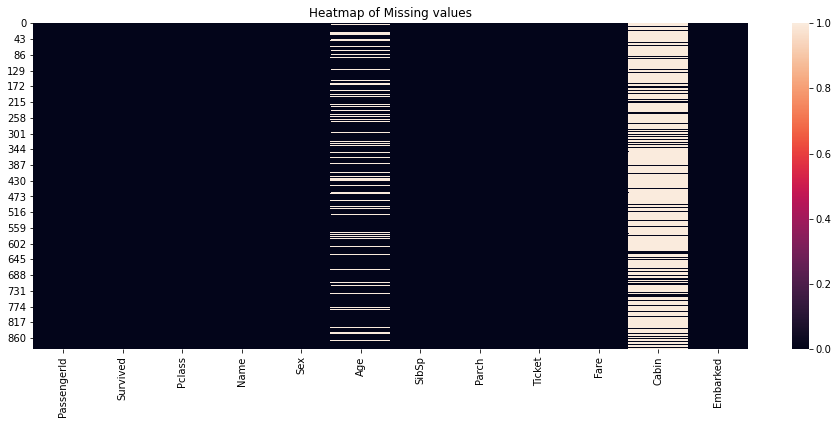

In [7]:
sns.heatmap(train.isnull(), cbar = True).set_title("Heatmap of Missing values")
plt.gcf().set_size_inches(16,6)

# Check for unique values

In [9]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Features

## 1. Survived

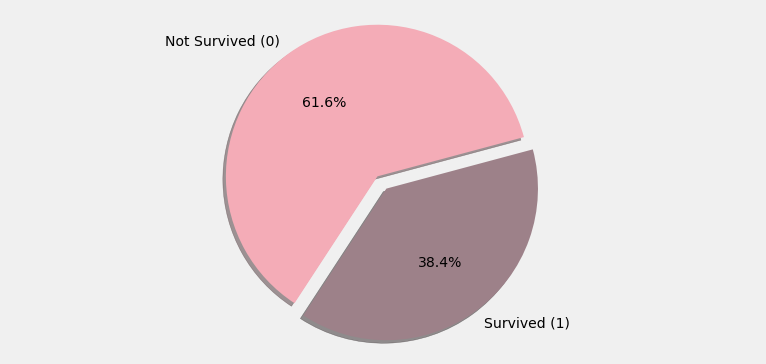

In [15]:
X = train['Survived'].value_counts().index
Y = train['Survived'].value_counts()
plt.style.use("fivethirtyeight")
myexplode=(0.0,0.1)
mylabel = ["Not Survived (0)", "Survived (1)"]
colors = ["#f4acb7","#9d8189"]
plt.pie(Y, labels=mylabel, autopct = "%1.1f%%", startangle=15, shadow=True, explode=myexplode, colors=colors)
plt.axis("equal")
plt.gcf().set_size_inches(12,6)
plt.show()

## 2. Pclass

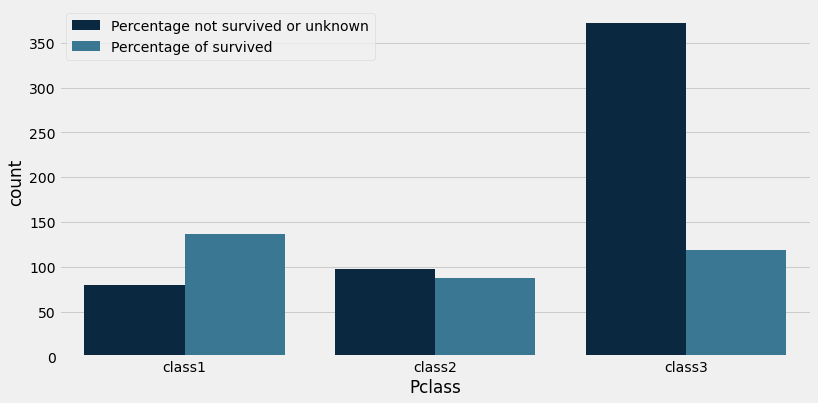

In [16]:
hue_color = {0:'#012a4a',1:'#2c7da0'}
Pclass = ['class1', 'class2', 'class3']
plt.style.use("fivethirtyeight")
ax = sns.countplot(data=train, x='Pclass', hue = 'Survived', palette = hue_color)
plt.xticks(ticks = [0,1,2], labels = Pclass)
plt.legend(['Percentage not survived or unknown','Percentage of survived'])
plt.gcf().set_size_inches(12,6)
plt.show()

## 3. Sex

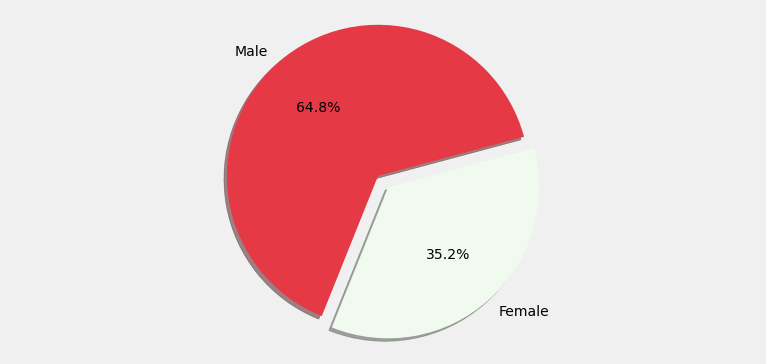

In [17]:
Y = train["Sex"].value_counts()
myexplode = (0.0, 0.1)
plt.style.use("fivethirtyeight")
mylabel = ['Male', 'Female']
colors = ['#E63946', '#F1FAEE']
plt.pie(Y, labels = mylabel, autopct = "%1.1f%%", startangle = 15, shadow = True, explode = myexplode, colors = colors)
plt.axis("equal")
plt.gcf().set_size_inches(12,6)
plt.show()

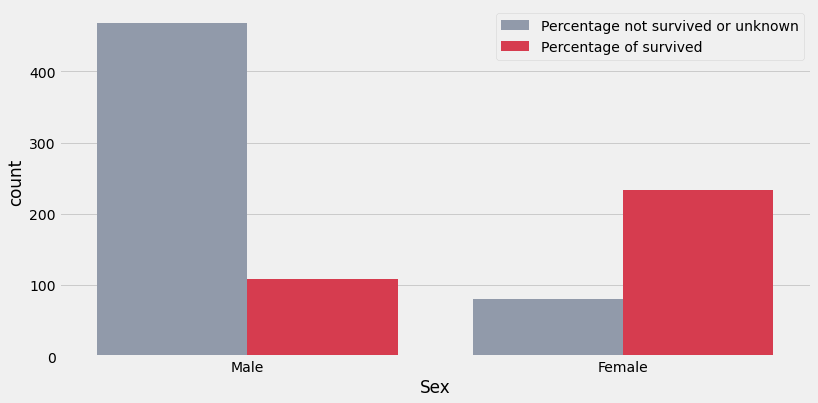

In [20]:
hue_color={0:'#8D99AE',1:'#ef233c'}
Sex=['Male','Female']
plt.style.use("fivethirtyeight")
ax=sns.countplot(data=train,x='Sex',hue='Survived',palette=hue_color)
plt.xticks(ticks = [0,1], labels = Sex)
plt.legend(['Percentage not survived or unknown', 'Percentage of survived'])
plt.gcf().set_size_inches(12,6)
plt.show()

## 4. Age

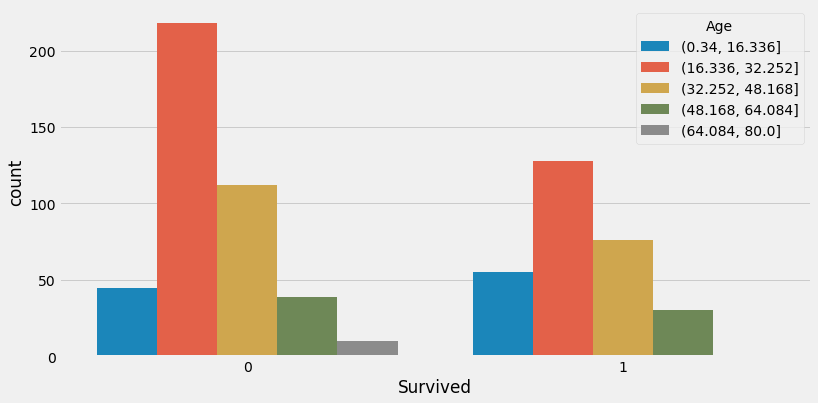

In [21]:
sns.countplot(x=train['Survived'], hue=pd.cut(train['Age'],5))
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)

## 5. SibSp

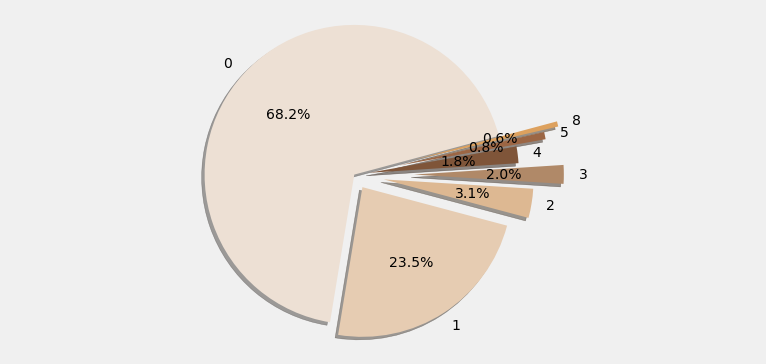

In [22]:
Y = train['SibSp'].value_counts()
myexplode = (0.0,0.1,0.2,0.4,0.1,0.3,0.4)
plt.style.use("fivethirtyeight")
mylabel = [0,1,2,3,4,5,8]
colors = ['#ede0d4','#e6ccb2','#ddb892','#b08968','#7f5539','#9c6644','#dda15e']
plt.pie(Y, labels=mylabel, autopct = '%1.1f%%', startangle = 15, shadow = True, explode = myexplode, colors = colors)
plt.axis("equal")
plt.gcf().set_size_inches(12,6)
plt.show()

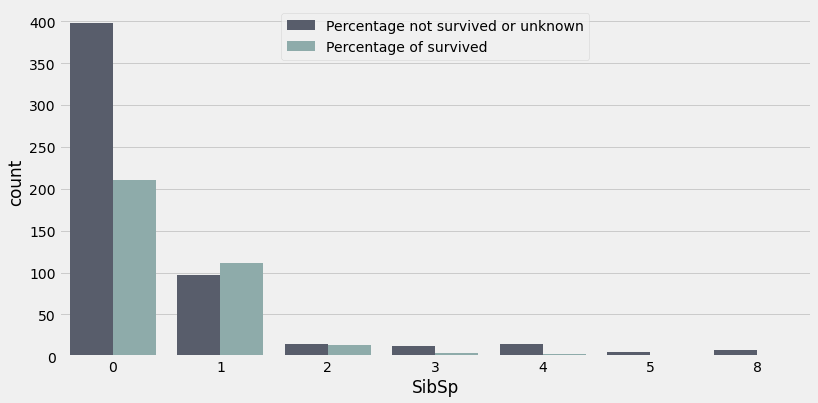

In [24]:
hue_color = {0:'#555b6e',1:'#89b0ae'}
plt.style.use("fivethirtyeight")
ax = sns.countplot(data = train, x = 'SibSp', hue = 'Survived', palette = hue_color)
#plt.xticks(ticks = [0,1], labels = Sex)
plt.legend(["Percentage not survived or unknown", "Percentage of survived"])
plt.gcf().set_size_inches(12,6)
plt.show()

## 6. Parch

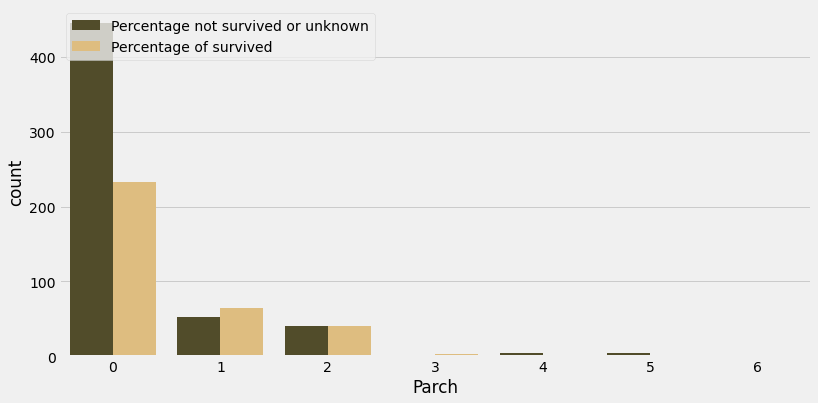

In [25]:
hue_color={0:'#585123',1:'#eec170'}
plt.style.use("fivethirtyeight")
ax = sns.countplot(data = train, x = 'Parch', hue = 'Survived', palette = hue_color)
plt.legend(["Percentage not survived or unknown", "Percentage of survived"])
plt.gcf().set_size_inches(12,6)
plt.show()

## 7. Fare

In [26]:
# We take the values of bins from the statistical analysis of column 'Fare'
train['Fare_Category'] = pd.cut(train['Fare'], bins=[0,7.9,14.45,31.28,120], labels = ['Low','Mid','High_Mid','High'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Mid
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,High_Mid
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,High_Mid
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,High_Mid


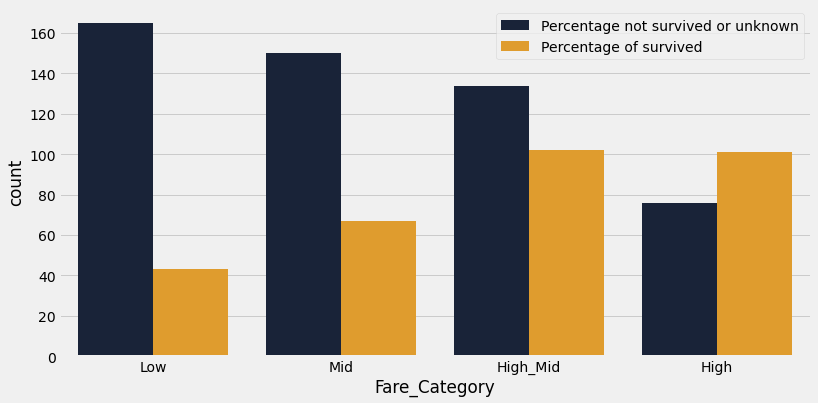

In [27]:
hue_color={0:'#14213d',1:'#fca311'}
Fare_category = ['Low', 'Mid', 'High_Mid', 'High']
plt.style.use("fivethirtyeight")
ax = sns.countplot(data = train, x = 'Fare_Category', hue = 'Survived', palette = hue_color)
plt.legend(["Percentage not survived or unknown", "Percentage of survived"])
plt.gcf().set_size_inches(12,6)
plt.show()

## 8. Embarked

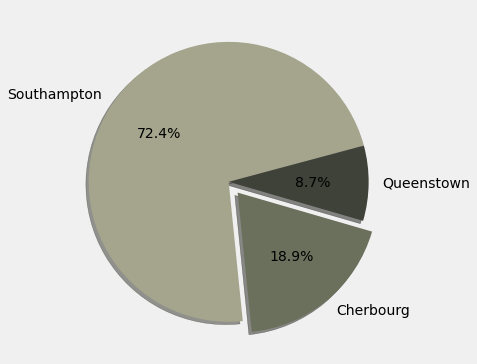

In [28]:
Y = train['Embarked'].value_counts()
myexplode = (0.0,0.1,0.0)
plt.style.use("fivethirtyeight")
mylabel = ['Southampton', 'Cherbourg', 'Queenstown']
colors = ['#a5a58d', '#6b705c','#3f4238']
plt.pie(Y, labels = mylabel, autopct = '%1.1f%%', startangle = 15, shadow = True, explode = myexplode, colors = colors)
plt.gcf().set_size_inches(12,6)
plt.show()

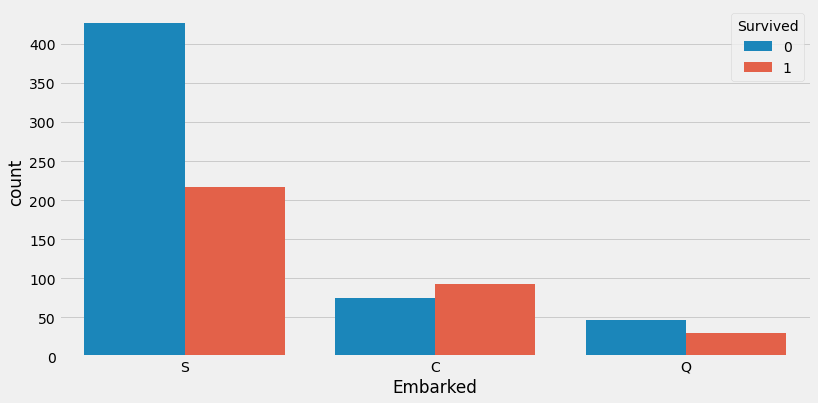

In [29]:
sns.countplot(x = train['Embarked'], hue = train['Survived'])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)